# pre process for multiple file

In [1]:
import shutil
import os
from tqdm import tqdm

In [ ]:
path='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM5/Pick_and_Place/seed1/'
path2='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM/Pick_and_Place_LLama3.2_1B/seed1/'
for x in tqdm(os.listdir(path)): 
    _x=int(x.replace("epochs_","").split("-")[0])
    shutil.copytree(path+x,path2+f"epochs_{_x+585}-{_x+590}",dirs_exist_ok=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
path='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLMflan4/Pick_and_Place'
path2='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM/Pick_and_Place_Flan-T5_78M'
shutil.copytree(path,path2,dirs_exist_ok=True)

'/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM/Pick_and_Place_Flan-T5_78M'

In [3]:
path='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLMwo/Pick_and_Place'
path2='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM/LLAMA_WO_Pick_and_Place'
shutil.copytree(path,path2,dirs_exist_ok=True)

'/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM/LLAMA_WO_Pick_and_Place'

In [2]:
path='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_textCompare2/Pick_and_Place/seed0/'
path2='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_textCompare/Pick_and_Place/seed0/'
for x in tqdm(os.listdir(path)): 
    _x=int(x.replace("epochs_","").split("-")[0])
    shutil.copytree(path+x,path2+f"epochs_{_x+95}-{_x+100}",dirs_exist_ok=True)

100%|##########| 38/38 [01:03<00:00,  1.67s/it]


In [ ]:
path='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLMwo2/Pick_and_Place/seed1/'
path2='/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM/LLAMA_WO_Pick_and_Place/seed1/'
for x in tqdm(os.listdir(path)): 
    _x=int(x.replace("epochs_","").split("-")[0])
    shutil.copytree(path+x,path2+f"epochs_{_x+65}-{_x+70}",dirs_exist_ok=True)

# plots

In [2]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import re
import math
import itertools
import seaborn as sns
from tqdm import tqdm
sns.set_theme()
path="/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_textpastactions"

In [3]:
def load_results(path, filter=None,lmin=0,lmax=5000):
    results = {}
    
    epoch_dirs = list(os.listdir(path))
    is_first = True
    sorted_epoch_dirs = sorted(epoch_dirs, key=lambda _dir: int(_dir.split('_')[1].split('-')[0]))
    for epoch_dir in tqdm(sorted_epoch_dirs[lmin:lmax]):
        
        with open(os.path.join(path, epoch_dir, "history.pkl"), 'rb') as file:
            new_logs = pickle.load(file)
            if is_first:
                results = new_logs
                is_first = False
            else:
                for k,v in new_logs.items():
                    #if k!="prompts":
                        results[k].extend(v)
    return results

In [11]:
results = load_results("/home/bahaduri/VIPER/outputs/LLM_1", filter="")
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="")

100%|██████████| 149/149 [00:00<00:00, 206.32it/s]


In [10]:
results['ep_ret'][0]

0

In [4]:
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis = -1), arr.std(axis=-1)

In [37]:
results['LLM_1'].keys()

dict_keys(['ep_len', 'ep_ret', 'goal', 'loss', 'policy_loss', 'value_loss', 'possible_actions', 'actions', 'prompts', 'entropy'])

In [5]:
def plot_mean_sr(experiments, avg_window=10, leg_label = "", label_filter=".*", plot_seeds=False, show_legend=True, save_fig=False, labels_replace="", figsize=(10,6),cleaner=1,color="blue"):
    step_freq = 100
    pattern = re.compile(label_filter)
    #plt.figure(figsize=figsize)
    xs, ys = [], []
    for label, results in experiments.items():  #expects dict of dict example seed_1:{ep_ret:, ...}
        print(label)
        
        if True:
         
            raw_steps = np.cumsum(results["ep_len"])
            fixed_freq_steps = np.arange(0, raw_steps[-1], step_freq)
            success_rate = [1 if _ret > 0 else 0 for _ret in results["ep_ret"]]
            averaged_success_rate = [np.mean(success_rate[i-avg_window:i]) for i in range(len(success_rate))]
            xs.append(raw_steps)
            ys.append(averaged_success_rate)
        
        
    shortest_x = min([len(_x) for _x in xs])
    xs = np.array([_x[:shortest_x] for _x in xs])
    x = np.mean(xs, axis=0)
    ys = np.array([_y[:shortest_x] for _y in ys])
    print(ys.shape)
    _x=[__i for __i in range(len(x))]
    mean_y, std_y = np.mean(ys, axis=0), np.std(ys, axis=0)
    print(len(x),len(mean_y))
    # mean_y, std_y = tolerant_mean(ys)
    # x, _ = tolerant_mean(xs)
    if labels_replace!="":
        label=labels_replace
    p = plt.plot(_x, mean_y/cleaner, label=leg_label,color=color)

    ax = plt.gca()
    #ax.set_ylim([0, 1])  #/np.sqrt(3)
    plt.fill_between(_x, (mean_y/cleaner)-std_y/np.sqrt(3), (mean_y/cleaner)+std_y/np.sqrt(3), alpha=0.2, color=p[0].get_color())
    if plot_seeds:
        for _x, _y in zip(xs, ys):
            #plt.plot(_x, _y, alpha=0.3, color=p[0].get_color())
            pass
    if show_legend:
        plt.legend()
        
    if save_fig:
        plt.savefig(f'mean_sr_{label_filter}_avg_{avg_window}.png', bbox_inches='tight')

In [6]:
def plot_mean_eplen(experiments, avg_window=10, label_filter=".*", plot_seeds=False, show_legend=True, save_fig=True, labels_replace="", figsize=(10,6),color="blue"):
    step_freq = 100
    pattern = re.compile(label_filter)
    #plt.figure(figsize=figsize)
    for label, results in experiments.items():
        if not pattern.match(label):
            continue
        xs, ys = [], []
        for seed, seed_results in results.items():
          if seed==1:  
            raw_steps = np.cumsum(seed_results["ep_len"])
            
            fixed_freq_steps = np.arange(0, raw_steps[-1], step_freq)
            success_rate = [_ret for _ret in seed_results["ep_len"]]
            #success_rate=list(filter(lambda x:x<50,success_rate))
            averaged_success_rate = [np.mean(success_rate[i-avg_window:i]) for i in range(len(success_rate))]
            xs.append(raw_steps)
            ys.append(averaged_success_rate)
        
        
        shortest_x = min([len(_x) for _x in xs])
        xs = np.array([_x[:shortest_x] for _x in xs])
        x = np.mean(xs, axis=0)
        ys = np.array([_y[:shortest_x] for _y in ys])
        mean_y, std_y = np.mean(ys, axis=0), np.std(ys, axis=0)
        # mean_y, std_y = tolerant_mean(ys)
        # x, _ = tolerant_mean(xs)
        p = plt.plot(list(range(len(mean_y))), mean_y, label=label,color=color)
        plt.fill_between(list(range(len(mean_y))), mean_y-std_y/np.sqrt(3), mean_y+std_y/np.sqrt(3), alpha=0.2, color=p[0].get_color())
        if plot_seeds:
            for _x, _y in zip(xs, ys):
                plt.plot(_x, _y, alpha=0.3, color=p[0].get_color())
    if show_legend:
        plt.legend()
        
    if save_fig:
        plt.savefig(f'mean_sr_{label_filter}_avg_{avg_window}.png', bbox_inches='tight')

In [7]:
def per_task_mean_sr(experiment, avg_window=10):
    tasks = {
        "go to": {"regex": r"^Goal of the agent: go to [a-z]+ [a-z]+ [a-z]+$", "xs": [], "ys": []},
        "go to after": {"regex": r"after", "xs": [], "ys": []},
        "pick up": {"regex": r"^Goal of the agent: pick up [a-z]+ [a-z]+ [a-z]+$", "xs": [], "ys": []},
        "pick up then go to": {"regex": r"then", "xs": [], "ys": []},
        "put": {"regex": r"^Goal of the agent: put", "xs": [], "ys": []},
        "open": {"regex": r"^Goal of the agent: open", "xs": [], "ys": []},
    }
    step_freq = 100
    
    for seed, seed_results in experiment.items(): 
        print(seed)
        for task_name, task_results in tasks.items():
            task_idxs = [idx for idx, goal in enumerate(seed_results["goal"]) if re.search(task_results["regex"], goal) and idx < len(seed_results["ep_len"])]
            lens_and_returns = [(seed_results["ep_len"][i], seed_results["ep_ret"][i]) for i in task_idxs]
            raw_steps = np.cumsum([_v[0] for _v in lens_and_returns])
            if len(raw_steps) == 0:
                print(task_name)
            fixed_freq_steps = np.arange(0, raw_steps[-1], step_freq)
            success_rate = [1 if _v[1] > 0 else 0 for _v in lens_and_returns]
            averaged_success_rate = [np.mean(success_rate[i-avg_window:i]) for i in range(len(success_rate))]
            interpolated_sr = np.interp(fixed_freq_steps, raw_steps, averaged_success_rate)
            task_results["xs"].append(fixed_freq_steps)
            task_results["ys"].append(interpolated_sr)
    n_columns = 3
    n_rows = math.ceil(len(tasks) / n_columns)
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(20, 20))
    axs = axs.flatten()
    for i, task_name in enumerate(tasks.keys()):
        mean_y, std_y = tolerant_mean(tasks[task_name]["ys"])
        x = np.arange(0, np.max([_x[-1] for _x in tasks[task_name]["xs"]]) + step_freq, step_freq)
        p = axs[i].plot(x, mean_y)
        axs[i].fill_between(x, mean_y-std_y, mean_y+std_y, alpha=0.2, color=p[0].get_color())
        axs[i].set_title(task_name)
    
    plt.show()

In [8]:
def plot_episodes(experiment, n=10, start=0, stop=None):
    step_idxs = np.random.randint(start, len(experiment["prompts"]) if stop is None else stop, n)
    for _step in step_idxs:
        print(f"Step {_step}")
        print(f"Obs: {experiment['prompts'][_step]}")
        print(f"Generate text:'{experiment['actions'][_step]}'")
        print(f"Return: {experiment['returns'][_step]}")

In [9]:
def sanity_check(experiment):
    print("Policy loss:")
    plt.plot(range(len(experiment["policy_loss"])), experiment["policy_loss"])
    plt.show()
    print("Value loss:")
    plt.plot(range(len(experiment["value_loss"])), experiment["value_loss"])
    plt.show()
    print("Loss:")
    plt.plot(range(len(experiment["loss"])), experiment["loss"])
    plt.show()
    print("kl:")
    plt.plot(range(len(experiment["kl"])), experiment["kl"])
    plt.show()

## Sanity

In [10]:
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/FTVLMargmax7", filter="P")
expe_results = results['LLM_1']
print(expe_results.keys())
print(len(expe_results['prompts']))
for idx in range(5900, 6000):
    print(f"Instance {idx}")
    print(f"Obs: {expe_results['prompts'][idx]}")
    print(f"Action: {expe_results['actions'][idx]}")
    print("-----------")

KeyError: 'LLM_1'

In [11]:
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/FTVLMsample", filter="P", lmax=lmax)
sanity_check(results["LLM_1"])

KeyError: 'LLM_1'

In [19]:
results['LLM_dual_1']['ep_ret']

0

In [6]:
def get_mean_sr(experiments, avg_window=10, leg_label = "", label_filter=".*", plot_seeds=False, show_legend=True, save_fig=False, labels_replace="", figsize=(10,6),cleaner=1,color="blue"):
    step_freq = 100
    pattern = re.compile(label_filter)
    #plt.figure(figsize=figsize)
    xs, ys = [], []
    for label, results in experiments.items():  #expects dict of dict example seed_1:{ep_ret:, ...}
#         print(label)
        
        if True:
         
            raw_steps = np.cumsum(results["ep_len"])
            fixed_freq_steps = np.arange(0, raw_steps[-1], step_freq)
            success_rate = [1 if _ret > 0 else 0 for _ret in results["ep_ret"]]
            averaged_success_rate = [np.mean(success_rate[i-avg_window:i]) for i in range(len(success_rate))]
            step_success = []
            print(len(averaged_success_rate))
            print(len(results["ep_len"]))
            for success, length in zip(averaged_success_rate, results["ep_len"]):
                step_success.extend([success] * length)
            xs.append(raw_steps)
            ys.append(step_success)
        
        
    shortest_x = min([len(_x) for _x in ys])
#     xs = np.array([_x[:shortest_x] for _x in xs])
#     x = np.mean(xs, axis=0)
    print(len(ys[0]))
    print(len(ys[1]))
    print(len(ys[2]))
    ys = np.array([_y[:shortest_x] for _y in ys])
#     print(ys.shape)
    return ys#xs, ys

In [7]:

def plot_mean(rets, labels, colors, significance=None, plot_seeds=False, show_legend=True):
    """
    Plots mean ± std/sqrt(3) for multiple sets of time series.

    Parameters:
    - rets: list of arrays, each shape (n_seeds, time_steps)
    - labels: list of strings for each line
    - colors: list of colors for each line
    - significance: optional boolean array (time_steps,) marking significance
    - plot_seeds: whether to plot individual seeds
    - show_legend: whether to show the legend
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    for ys, color, label in zip(rets, colors, labels):
        #ys = np.array(ys)  # shape: (n_seeds, time_steps)
        mean_y = np.mean(ys, axis=0)
        std_y = np.std(ys, axis=0)

        x = np.arange(len(mean_y))
        line, = ax.plot(x, mean_y, label=label, color=color)
        ax.fill_between(x, mean_y - std_y / np.sqrt(3), mean_y + std_y / np.sqrt(3),
                        alpha=0.2, color=color)

        if plot_seeds:
            for y_seed in ys:
                ax.plot(x, y_seed, alpha=0.3, color=color)

    if significance is not None:
        ax.fill_between(np.arange(len(significance)), 0, 1,
                        where=significance, alpha=0.1, color='red', transform=ax.get_xaxis_transform())

    if show_legend:
        ax.legend()

    plt.tight_layout()
    plt.show()

In [8]:
from scipy.stats import ttest_ind

def p_test(ys_A, ys_B):
    p_values = []
    for t in range(ys_A.shape[1]):
        _, p = ttest_ind(ys_A[:, t], ys_B[:, t], equal_var=False)  # Welch's t-test
        p_values.append(p)
    return p_values

100%|██████████| 149/149 [00:01<00:00, 120.20it/s]


1322
1322
2195
2195
3157
3157
59579
59552
59600
shape:  (3, 59552)


100%|██████████| 149/149 [00:01<00:00, 123.53it/s]


1789
1789
2332
2332
1863
1863
59587
59592
59577
shape:  (3, 59577)


100%|██████████| 149/149 [00:00<00:00, 328.10it/s]


1967
1967
1620
1620
1523
1523
59599
59559
59599
shape:  (3, 59559)


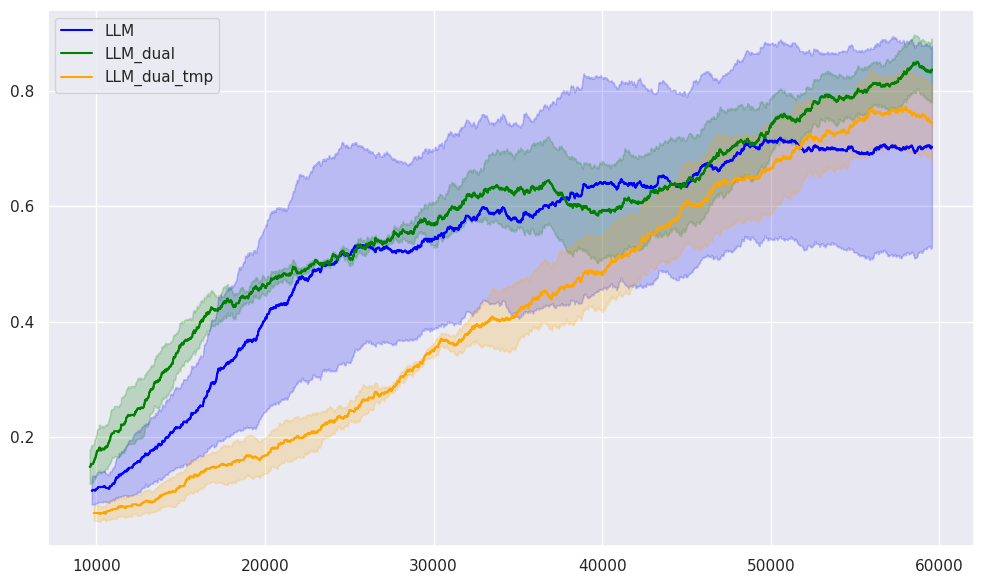

In [12]:
avgwindow=200
lmax=500
LLM={}
LLM["1"] = load_results("/home/bahaduri/VIPER/outputs/LLM_1")
# LLM["2"] = load_results("/home/bahaduri/VIPER/outputs/LLM_2")
LLM["3"] = load_results("/home/bahaduri/VIPER/outputs/LLM_3")
LLM["4"] = load_results("/home/bahaduri/VIPER/outputs/LLM_4")
LLM_ret = get_mean_sr(LLM, avg_window=avgwindow, leg_label="llm", label_filter="",cleaner=1,labels_replace="",show_legend= True,color="blue")
print("shape: ", LLM_ret.shape)
LLM_dual = {}
LLM_dual["1"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_1")
# LLM_dual["2"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_2")
LLM_dual["3"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_3")
LLM_dual["4"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_4")
LLM_dual_ret = get_mean_sr(LLM_dual, avg_window=avgwindow, leg_label="llm", label_filter="",cleaner=1,labels_replace="",show_legend= True,color="blue")
print("shape: ", LLM_dual_ret.shape)
LLM_dual_dcy = {}
LLM_dual_dcy["1"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_tmp_1")
# LLM_dual_dcy["2"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_tmp_2")
LLM_dual_dcy["3"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_tmp_3")
LLM_dual_dcy["4"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_tmp_4")
LLM_dual_dcy_ret = get_mean_sr(LLM_dual_dcy, avg_window=avgwindow, leg_label="llm-dual-dcy", label_filter="",cleaner=1,labels_replace="",show_legend= True,color="orange")
print("shape: ", LLM_dual_dcy_ret.shape)
min_len = min(LLM_ret.shape[1], LLM_dual_ret.shape[1], LLM_dual_dcy_ret.shape[1])
LLM_ret = LLM_ret[:, :min_len]
LLM_dual_ret = LLM_dual_ret[:, :min_len]
LLM_dual_dcy_ret = LLM_dual_dcy_ret[:, :min_len]
plot_mean([LLM_ret, LLM_dual_ret, LLM_dual_dcy_ret], ["LLM", "LLM_dual", "LLM_dual_tmp"], ["blue", "green", "orange"])

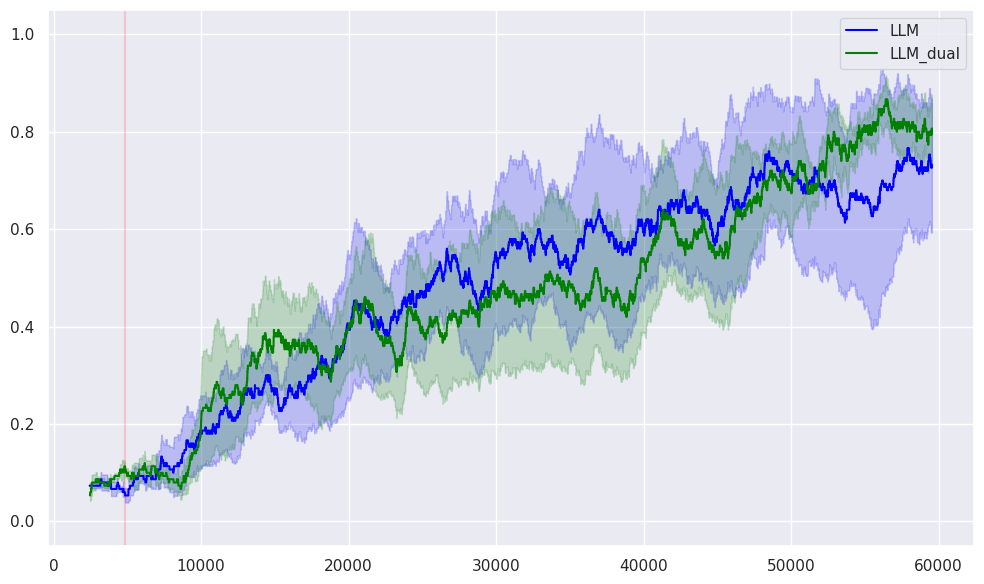

In [28]:
p_values = p_test(LLM_ret, LLM_dual_ret)
significance = np.array(p_values) < 0.05
plot_mean([LLM_ret, LLM_dual_ret], ["LLM", "LLM_dual"], ["blue", "green"], significance= significance)

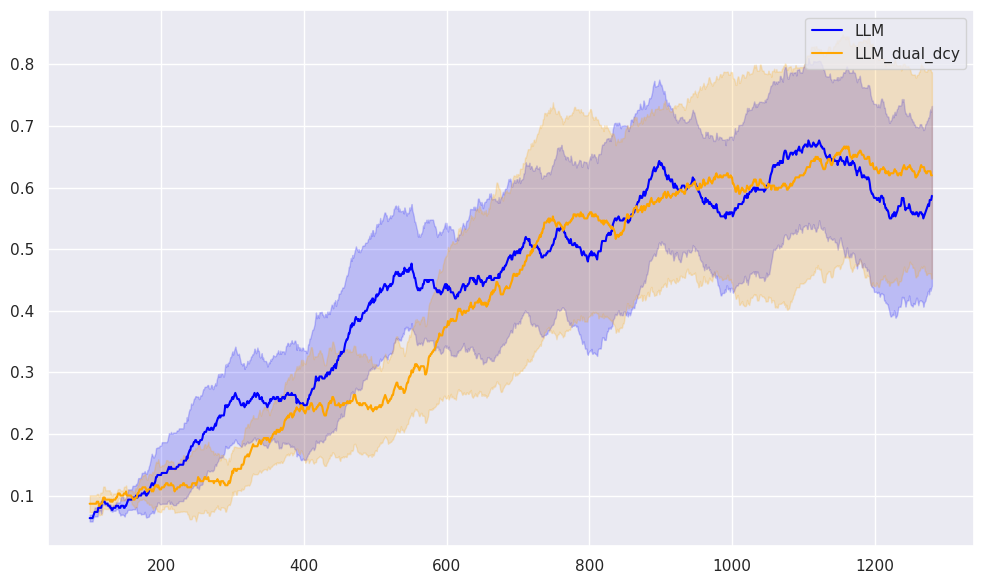

In [39]:
p_values = p_test(LLM_ret, LLM_dual_dcy_ret)
significance = np.array(p_values) < 0.05
plot_mean([LLM_ret, LLM_dual_dcy_ret], ["LLM", "LLM_dual_dcy"], ["blue", "orange"], significance= significance)

In [18]:
LLM_ret[1].shape

(3, 1322)

1
2
3
(3, 1322)
1322 1322
1
2
3
(3, 1478)
1478 1478
1
2
3
(3, 1281)
1281 1281


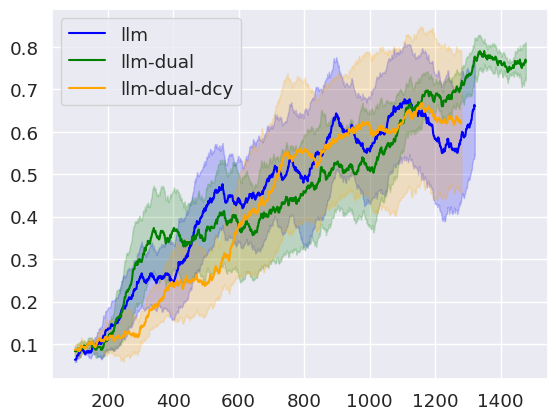

In [49]:
avgwindow=100
lmax=500
LLM={}
LLM["1"] = load_results("/home/bahaduri/VIPER/outputs/LLM_1")
LLM["2"] = load_results("/home/bahaduri/VIPER/outputs/LLM_2")
LLM["3"] = load_results("/home/bahaduri/VIPER/outputs/LLM_3")
plot_mean_sr(LLM, avg_window=avgwindow, leg_label="llm", label_filter="",cleaner=1,labels_replace="",show_legend= True,color="blue")
LLM_dual = {}
LLM_dual["1"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_1")
LLM_dual["2"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_2")
LLM_dual["3"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_3")
plot_mean_sr(LLM_dual, avg_window=avgwindow, leg_label="llm-dual", label_filter="",cleaner=1,labels_replace="",show_legend= True,color="green")
LLM_dual_dcy = {}
LLM_dual_dcy["1"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_1")
LLM_dual_dcy["2"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_2")
LLM_dual_dcy["3"] = load_results("/home/bahaduri/VIPER/outputs/LLM_dual_dcy_3")
plot_mean_sr(LLM_dual_dcy, avg_window=avgwindow, leg_label="llm-dual-dcy", label_filter="",cleaner=1,labels_replace="",show_legend= True,color="orange")

## BabyAI-Text

### Go To

LLM_1


100%|██████████| 149/149 [00:00<00:00, 149.58it/s]
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1322 1322
LLM_dual_1


100%|██████████| 149/149 [00:04<00:00, 29.99it/s]


1789 1789


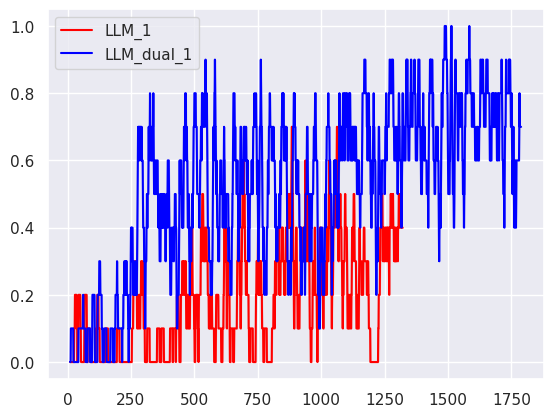

In [12]:
avgwindow=10
lmax=500
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/FTVLMsample", filter="", lmax=lmax)
results = load_results("/home/bahaduri/VIPER/outputs", filter="LLM_1")
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True,color="red")
results = load_results("/home/bahaduri/VIPER/outputs", filter="LLM_dual_1")
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True,color="blue")
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="red")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/FTVLMtext", filter="P", lmax=lmax)
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Pick_and_Place text",show_legend= True)
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="blue")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/FTVLMnoobs", filter="P", lmax=lmax)
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Pick_and_Place noobs",show_legend= True,color="green")
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="green")

FileNotFoundError: [Errno 2] No such file or directory: '/lustre/fsn1/projects/rech/lrp/commun/ICCVid'

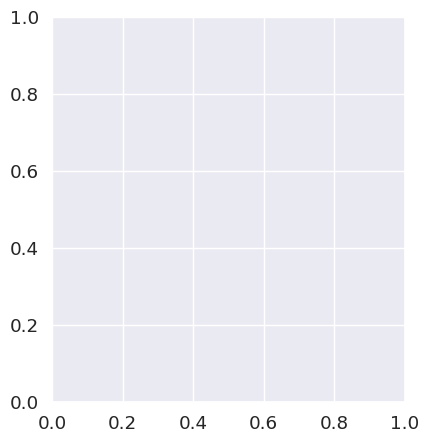

In [13]:
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="C")
avgwindow=100
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="P")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="H")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_textZS", filter="Pick_a")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_textZS", filter="E")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTOnlys", filter="E")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTZS", filter="Pick_t")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTZS", filter="E")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig(f'mean_sr__avg_{avg_window}.png', bbox_inches='tight')
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="H")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend=not True)


plt.subplot(1,2,1)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="E",lmax=500)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= not True,color="red")
plt.title("Examine in Light")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(1,2,2)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="red")
plt.title("Examine in Light")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')

plt.savefig("seed.pdf",bbox_inches='tight' , pad_inches=0)

FileNotFoundError: [Errno 2] No such file or directory: '/lustre/fsn1/projects/rech/lrp/commun/ICCVid'

<Figure size 1000x500 with 0 Axes>

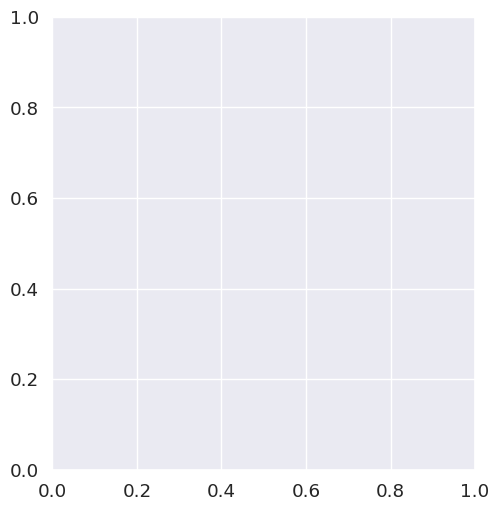

In [14]:
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="C")
avgwindow=2000
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="P")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="H")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_textZS", filter="Pick_a")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_textZS", filter="E")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTOnlys", filter="E")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTZS", filter="Pick_t")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTZS", filter="E")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig(f'mean_sr__avg_{avg_window}.png', bbox_inches='tight')
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="H")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend=not True)
plt.figure(figsize=(12,20))
plt.subplot(3,2,1)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="Pick_a",lmax=500)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=0.8,labels_replace="",show_legend= not True,color="blue")
plt.title("Pick and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(3,2,2)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="blue")
plt.title("Pick and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')
plt.subplot(3,2,3)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="E",lmax=500)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= not True,color="red")
plt.title("Examine in Light")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(3,2,4)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="red")
plt.title("Examine in Light")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')
plt.subplot(3,2,5)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="Cl",lmax=500)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=0.8,labels_replace="",show_legend= not True,color="green")
plt.title("Clean and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(3,2,6)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="green")
plt.title("Clean and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')
plt.savefig("rl1.pdf",bbox_inches='tight' , pad_inches=0)
plt.figure(figsize=(12,20))
plt.subplot(3,2,1)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="H",lmax=500)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=0.85,labels_replace="",show_legend= not True,color="orange")
plt.title("Heat and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(3,2,2)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="orange")
plt.title("Heat and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')
plt.subplot(3,2,3)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="Co",lmax=160)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=0.75,labels_replace="",show_legend= not True,color="purple")
plt.title("Cool and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(3,2,4)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="purple")
plt.title("Cool and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')
plt.subplot(3,2,5)
results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="Pick_t",lmax=500)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= not True,color="brown")
plt.title("Pick  Two and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('success rate')
plt.subplot(3,2,6)
plot_mean_eplen(results, avg_window=avgwindow, label_filter="",show_legend= not True,color="brown")
plt.title("Pick  Two and place")
plt.gca().set_xlabel('Episodes')
plt.gca().set_ylabel('Episode length')
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="E")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCVid", filter="Pick_")
#plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="",show_legend= True)
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="")
plt.savefig("rl2.pdf",bbox_inches='tight' , pad_inches=0)

In [15]:
avgwindow=100
plt.figure(figsize=(10,5))
results = load_results(path, filter="Pick_and",lmin=0,lmax=1)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Pick and place without obs")
results = load_results(path, filter="Pick_and",lmin=1,lmax=2)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Pick and place with obs")
plt.savefig("Pick_and_place.png")
plt.figure(figsize=(10,5))
results = load_results(path, filter="Examin",lmin=0,lmax=1)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Examin in light without obs")
results = load_results(path, filter="Examin",lmin=1,lmax=2)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Examin in light with obs")
plt.savefig("Examin_in_light.png")
plt.figure(figsize=(10,5))
results = load_results(path, filter="Clean",lmin=0,lmax=1)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Clean and place with obs")
results = load_results(path, filter="Clean",lmin=1,lmax=2)
plot_mean_sr(results, avg_window=avgwindow, label_filter="",cleaner=1,labels_replace="Clean and place without obs")
plt.savefig("Clean_and_place.png")
plt.show()
#results2 = load_results("/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_FTVLM2", filter="Examine_in_LightVLM___FT")
#plot_mean_sr(results2, avg_window=avgwindow, label_filter="",cleaner=1)
#results3 = oad_results("/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_text", filter="Examine")
#plot_mean_sr(results3, avg_window=avgwindow, label_filter="",cleaner=1)
#results4 = load_results("/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_textCompare", filter="Pick")
#plot_mean_sr(results4, avg_window=avgwindow, label_filter="",cleaner=1)
#results3 = load_results("/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_VLM4", filter="Pick")
#plot_mean_sr(results3, avg_window=200, label_filter="",cleaner=1)
#plt.plot([0,300000],[0,0.02],label="Pick_and_PlaceVLM___ZS")
#plt.plot([0,300000],[0,0.02],label="Examine_in_LightVLM___ZS")
plt.legend()
#plt.show()
#plt.savefig("rlvlm.png")

FileNotFoundError: [Errno 2] No such file or directory: '/lustre/fsn1/projects/rech/lrp/ufn64rt/PPO_textpastactions'

<Figure size 1000x500 with 0 Axes>

In [13]:
results.keys()

dict_keys(['Examine_in_Light'])

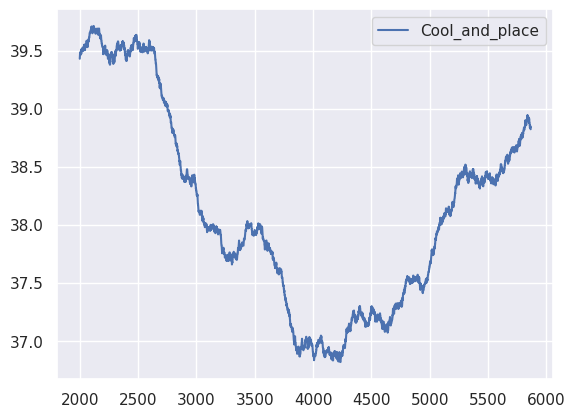

In [20]:
avgwindow=2000
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFT", filter="H")
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTZS", filter="H")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/ICCV", filter="")
plot_mean_eplen(results, avg_window=avgwindow, label_filter="")
#results = load_results("/lustre/fsn1/projects/rech/lrp/commun/PPO_VLMFTZS", filter="E")
#plot_mean_eplen(results, avg_window=avgwindow, label_filter="")
plt.show()

In [35]:
#print(results["Pick_and_Place"][1]["ep_len"])
print(results["Examine_in_Light"][1]['prompts'][10])

Possible actions of the agent: examine alarmclock 1, examine drawer 1, go to bed 1, go to desk 1, go to drawer 2, go to drawer 3, go to drawer 4, go to drawer 5, go to dresser 1, go to garbagecan 1, inventory, look, open drawer 1
Goal: Your task is to: examine the pillow with the desklamp.
Context: -= Welcome to TextWorld, ALFRED! =-, You are in the middle of a room. Looking quickly around you, you see a bed 1, a desk 1, a drawer 5, a drawer 4, a drawer 3, a drawer 2, a drawer 1, a dresser 1, and a garbagecan 1.
Past Observation: You arrive at loc 14. The drawer 3 is closed.
Past Action:go to drawer 1
Current Observation: You arrive at loc 4. The drawer 1 is closed.
Next action of the agent: 


In [17]:
print(results.keys())
print(results["Pick_and_Place_LLama_With_OBS"][1]['prompts'][10])

dict_keys(['.ipynb_checkpoints', 'Pick_and_Place_LLama3.2_1B', 'Pick_and_Place_LLama_With_OBS', 'Pick_and_Place_Flan-T5_78M', 'Pick_and_Place_LLama_Without_OBS'])
Goal: Your task is to: put a kettle in shelf
Current Observation: The image shows a kitchen with a counter top and a refrigerator in the background. On the counter top there are various objects such as a bucket, pillows, a knife, a book, and other items. There is also a sink with a tap, a bottle, a machine, and a window. The image is animated, giving it a realistic feel.
Past Action:go to shelf 2
Past Action:go to cabinet 1
Past Action:go to shelf 1
Past Action:go to stoveburner 2
Past Action:go to countertop 2
Past Action:go to cabinet 2
Past Action:go to fridge 1
Past Action:go to cabinet 1
Past Action:go to drawer 1
Past Action:go to countertop 3
Next action of the agent: 


# prompts


In [56]:
print(results['Pick_and_Place'][1].keys())
print(results['Pick_and_Place'][1]['prompts'][4])

dict_keys(['ep_len', 'ep_ret', 'goal', 'loss', 'policy_loss', 'value_loss', 'possible_actions', 'actions', 'prompts'])
Possible actions of the agent: go to cabinet 1, go to countertop 1, go to cabinet 2, go to countertop 2, go to stoveburner 1, go to drawer 1, go to drawer 2, go to drawer 3, go to stoveburner 3, go to drawer 4, go to stoveburner 4, go to cabinet 3, go to cabinet 4, go to microwave 1, go to cabinet 5, go to cabinet 6, go to cabinet 7, go to sink 1, go to sinkbasin 1, go to fridge 1, go to toaster 1, go to coffeemachine 1, go to cabinet 8, go to drawer 5, go to drawer 6, go to drawer 7, go to drawer 8, go to shelf 1, go to shelf 2, go to countertop 3, go to shelf 3, go to drawer 9, go to garbagecan 1, put fork 1 in/on stoveburner 2, inventory, look, examine fork 1, examine stoveburner 2
Goal: Your task is to: put a kettle in shelf
Past Observation: You arrive at loc 10. The cabinet 1 is closed. 
Past Action:go to stoveburner 2
Past Observation: You arrive at loc 10. On t

/tmp/xpython_1242810/2807157691.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


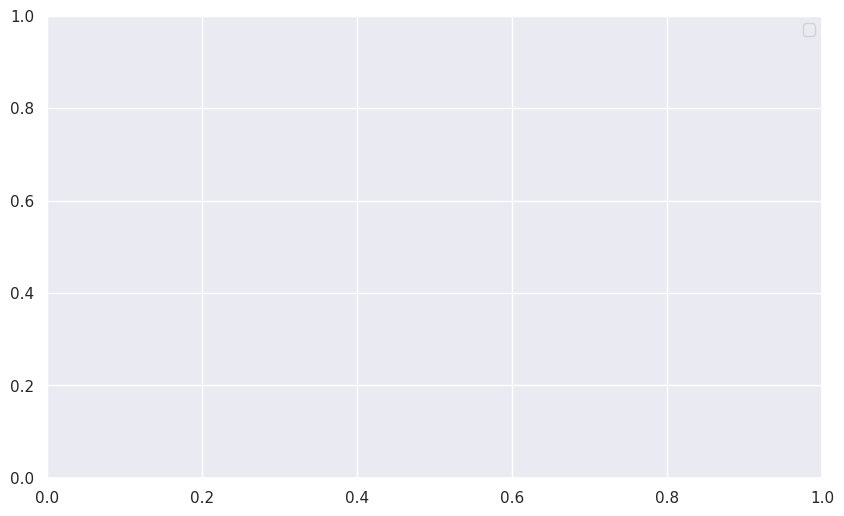

In [71]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIGoToLocalS6N4_FlanT5780M*", save_fig=True)

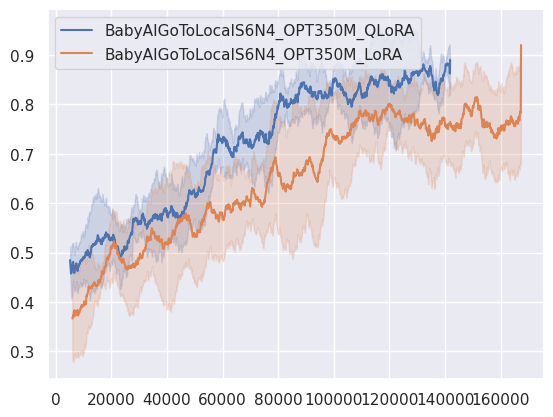

In [11]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIGoToLocalS6N4_OPT350M*", save_fig=True)

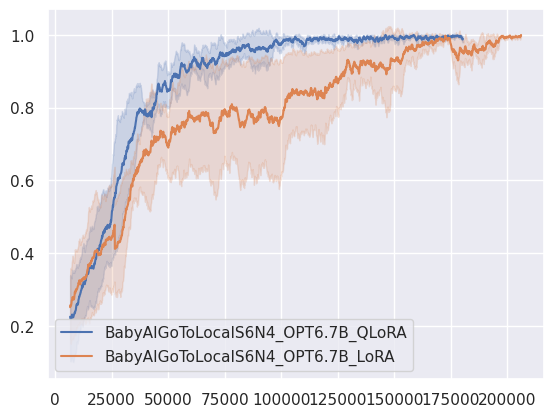

In [12]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIGoToLocalS6N4_OPT6.7B*", save_fig=True)

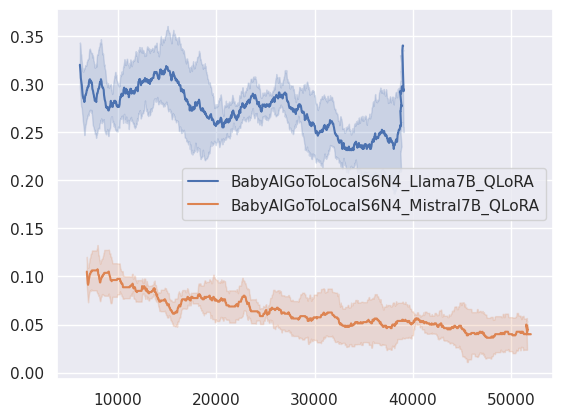

In [26]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIGoToLocalS6N4_(Mistral|Llama)7B_QLoRA", save_fig=True)

/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


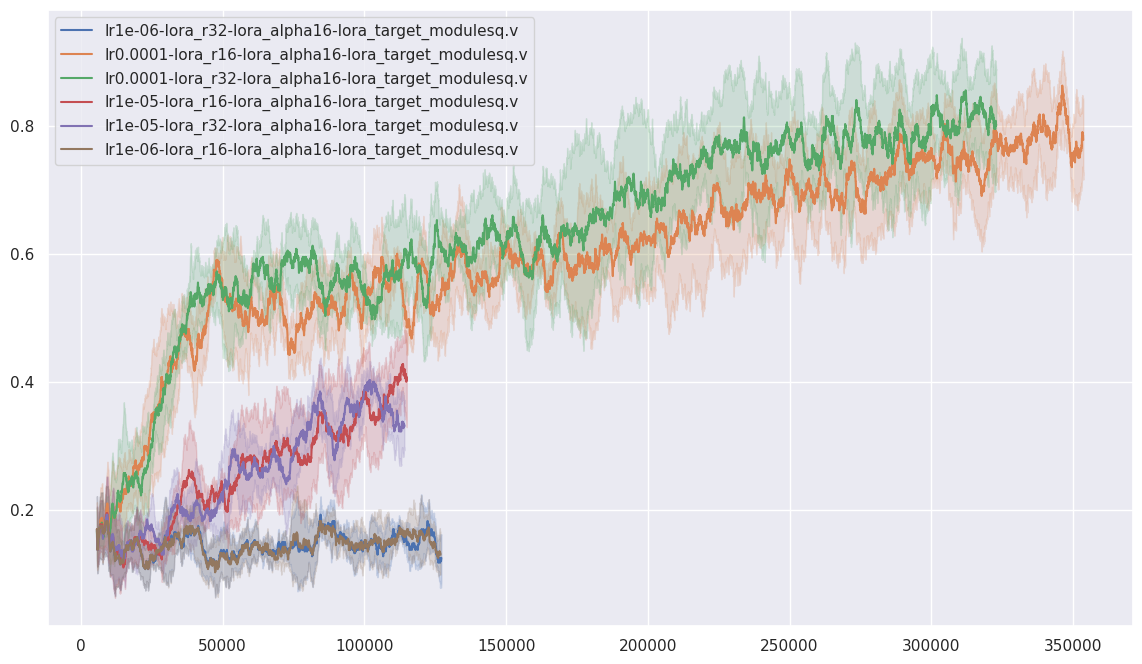

In [10]:
plot_mean_sr(results, avg_window=100, label_filter="HP_flan-t5-large_BabyAI-GoToLocal-v0_lr[0-9\-e.]*-lora_r[0-9]+-lora_alpha[0-9]+-lora_target_modulesq.v$", show_legend=True, save_fig=True, labels_replace="HP_flan-t5-large_BabyAI-GoToLocal-v0_", figsize=(14, 8))

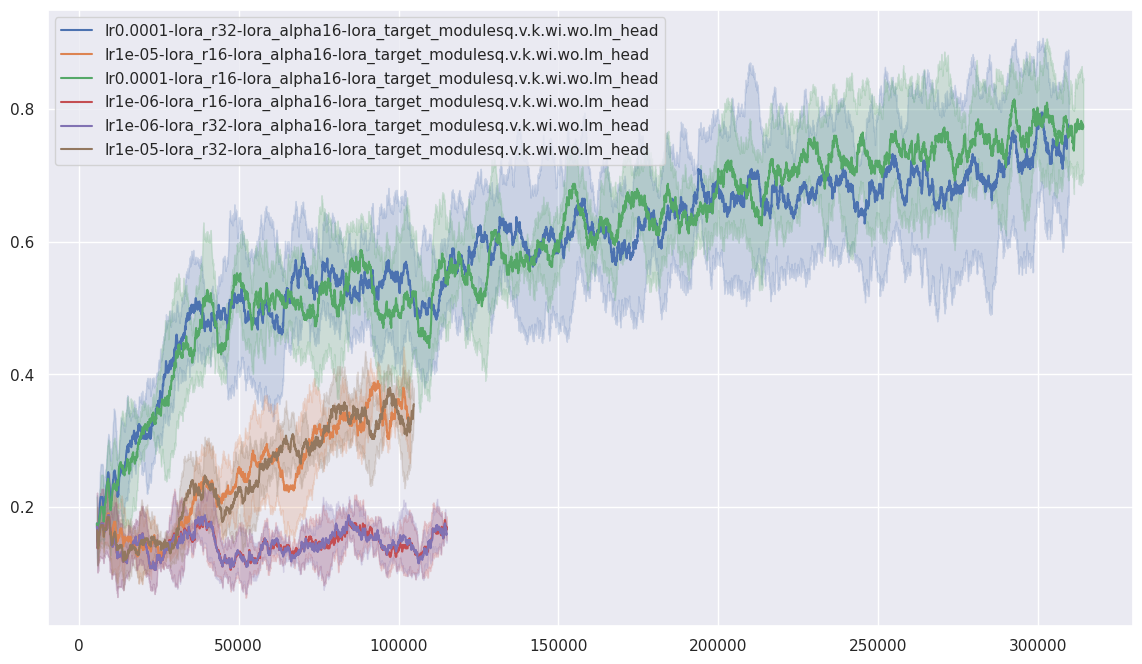

In [11]:
plot_mean_sr(results, avg_window=100, label_filter="HP_flan-t5-large_BabyAI-GoToLocal-v0_lr[0-9\-e.]*-lora_r[0-9]+-lora_alpha[0-9]+-lora_target_modulesq.v.k.wi.wo.lm_head", show_legend=True, save_fig=True, labels_replace="HP_flan-t5-large_BabyAI-GoToLocal-v0_", figsize=(14, 8))

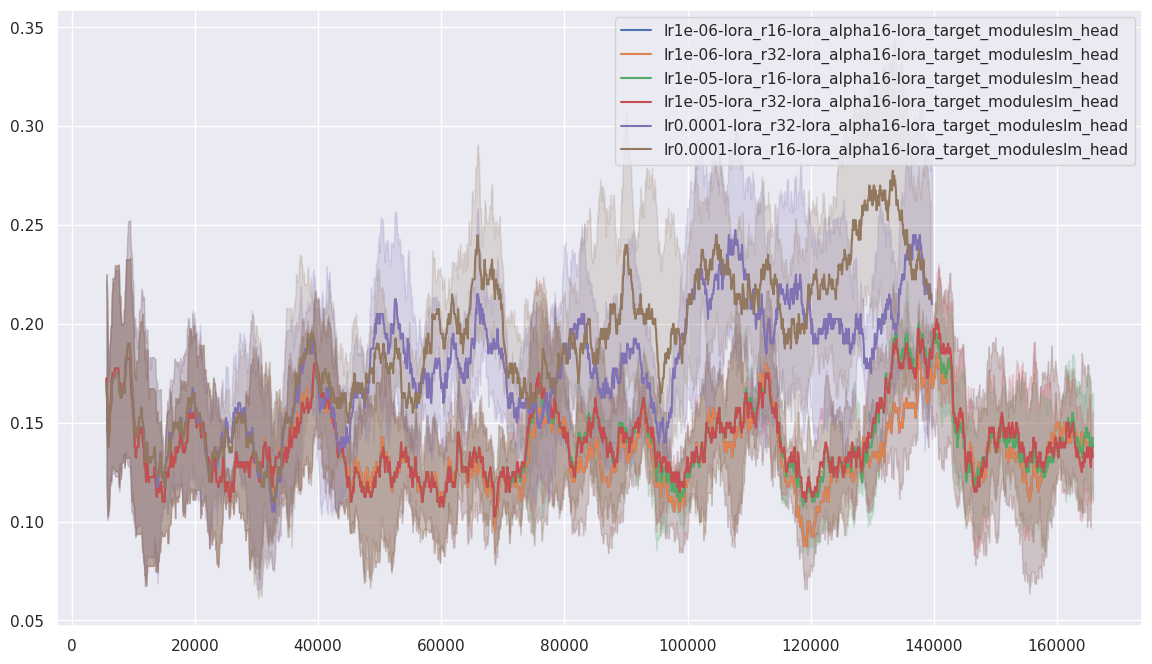

In [61]:
plot_mean_sr(results, avg_window=100, label_filter="HP_flan-t5-large_BabyAI-GoToLocal-v0_lr[0-9\-e.]*-lora_r[0-9]+-lora_alpha[0-9]+-lora_target_moduleslm_head", show_legend=True, save_fig=True, labels_replace="HP_flan-t5-large_BabyAI-GoToLocal-v0_", figsize=(14, 8))

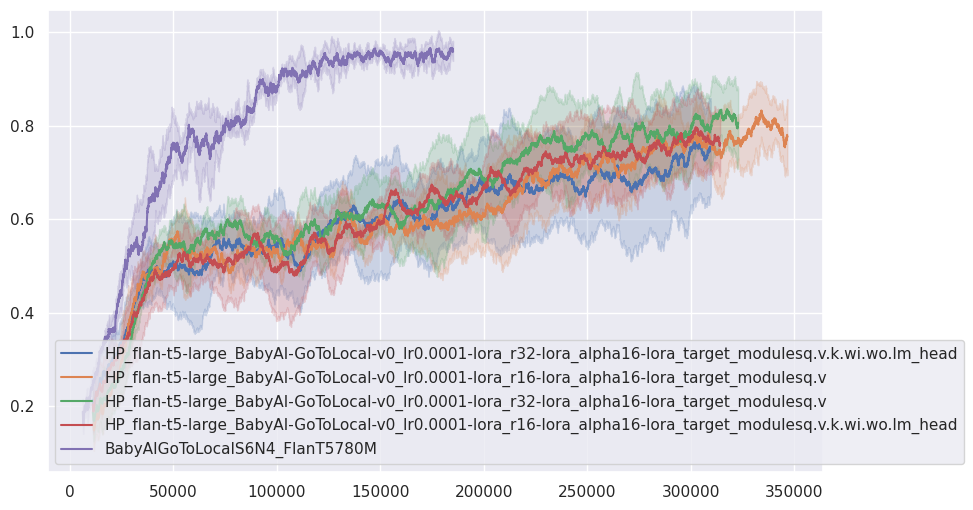

In [19]:
plot_mean_sr(results, avg_window=200, label_filter="(BabyAIGoToLocalS6N4_FlanT5780M|HP_flan-t5-large_BabyAI-GoToLocal-v0_lr0.0001-lora_r(16|32)-lora_alpha16-lora_target_modulesq.v)", save_fig=False)

### Pick up

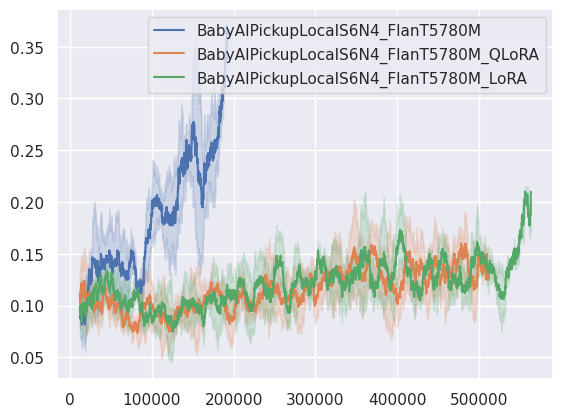

In [14]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIPickupLocalS6N4_FlanT5780M*", save_fig=True)

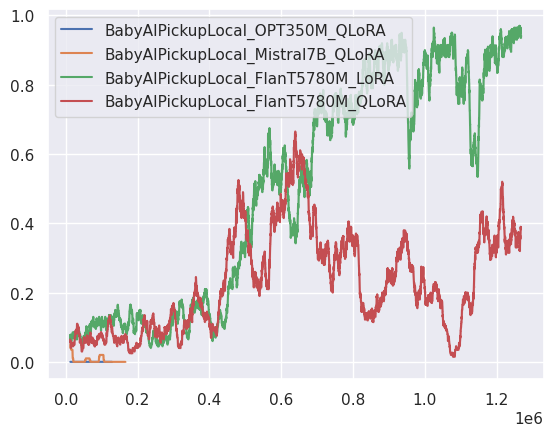

In [11]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIPickup*")

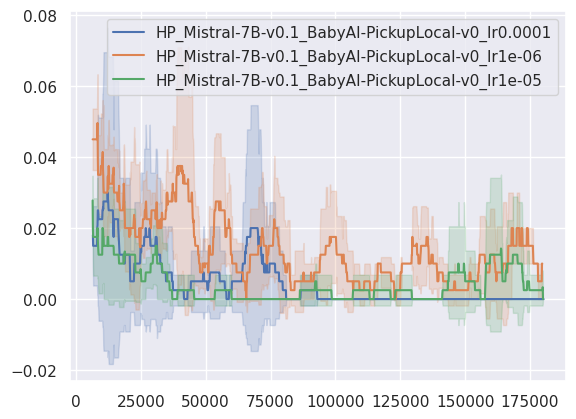

In [13]:
plot_mean_sr(results, avg_window=100, label_filter="HP_Mistral*", show_legend=True, save_fig=True)

/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


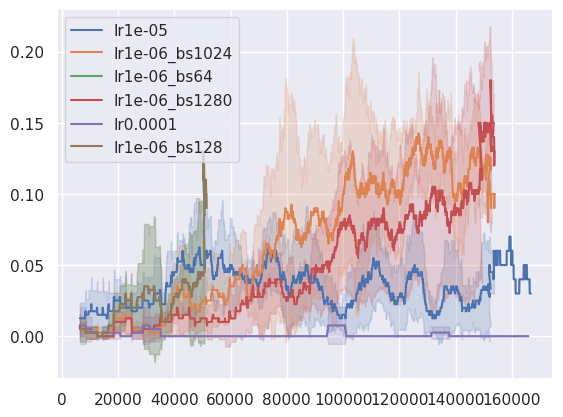

In [9]:
plot_mean_sr(results, avg_window=100, label_filter="HP_opt*", show_legend=True, save_fig=True, labels_replace="HP_opt-6.7b_BabyAI-PickupLocal-v0_")

/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


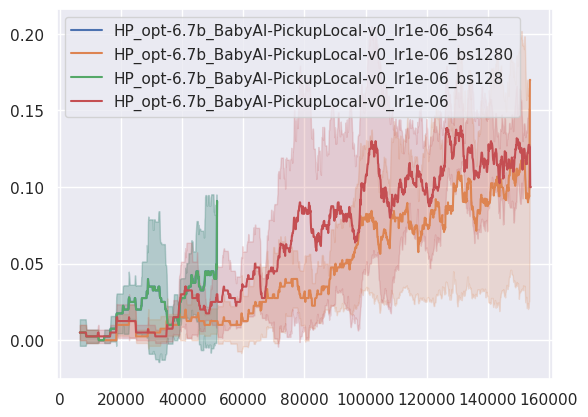

In [9]:
plot_mean_sr(results, avg_window=100, label_filter="HP_opt-6.7b_BabyAI-PickupLocal-v0_lr1e-06", show_legend=True, save_fig=True)

### Put Next

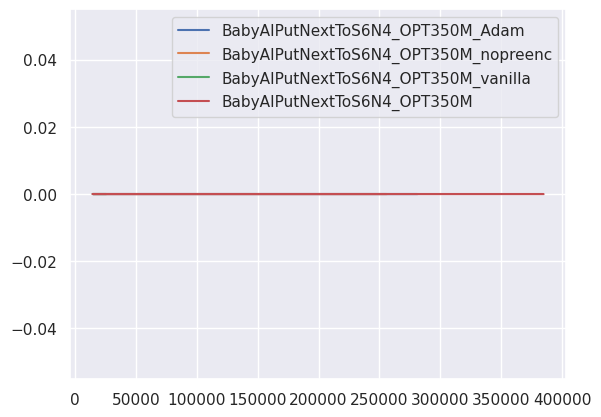

In [34]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIPutNext*")

### Mixed

/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cromac/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


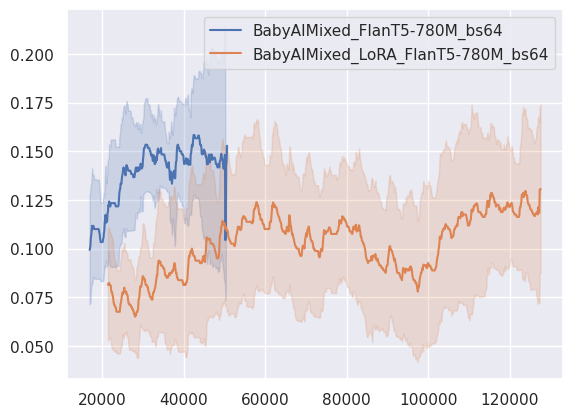

In [9]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIMixed(_LoRA|)_FlanT5-780M")

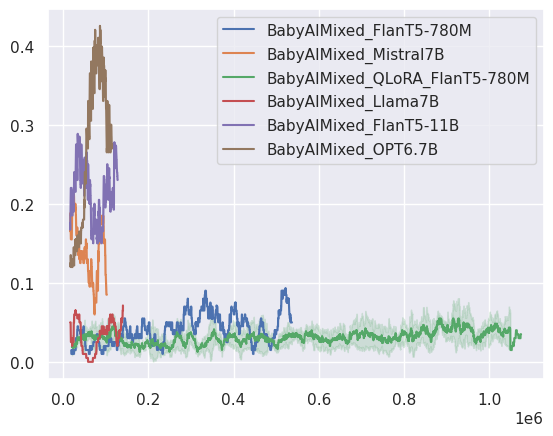

In [16]:
plot_mean_sr(results, avg_window=200, label_filter="BabyAIMixed*")

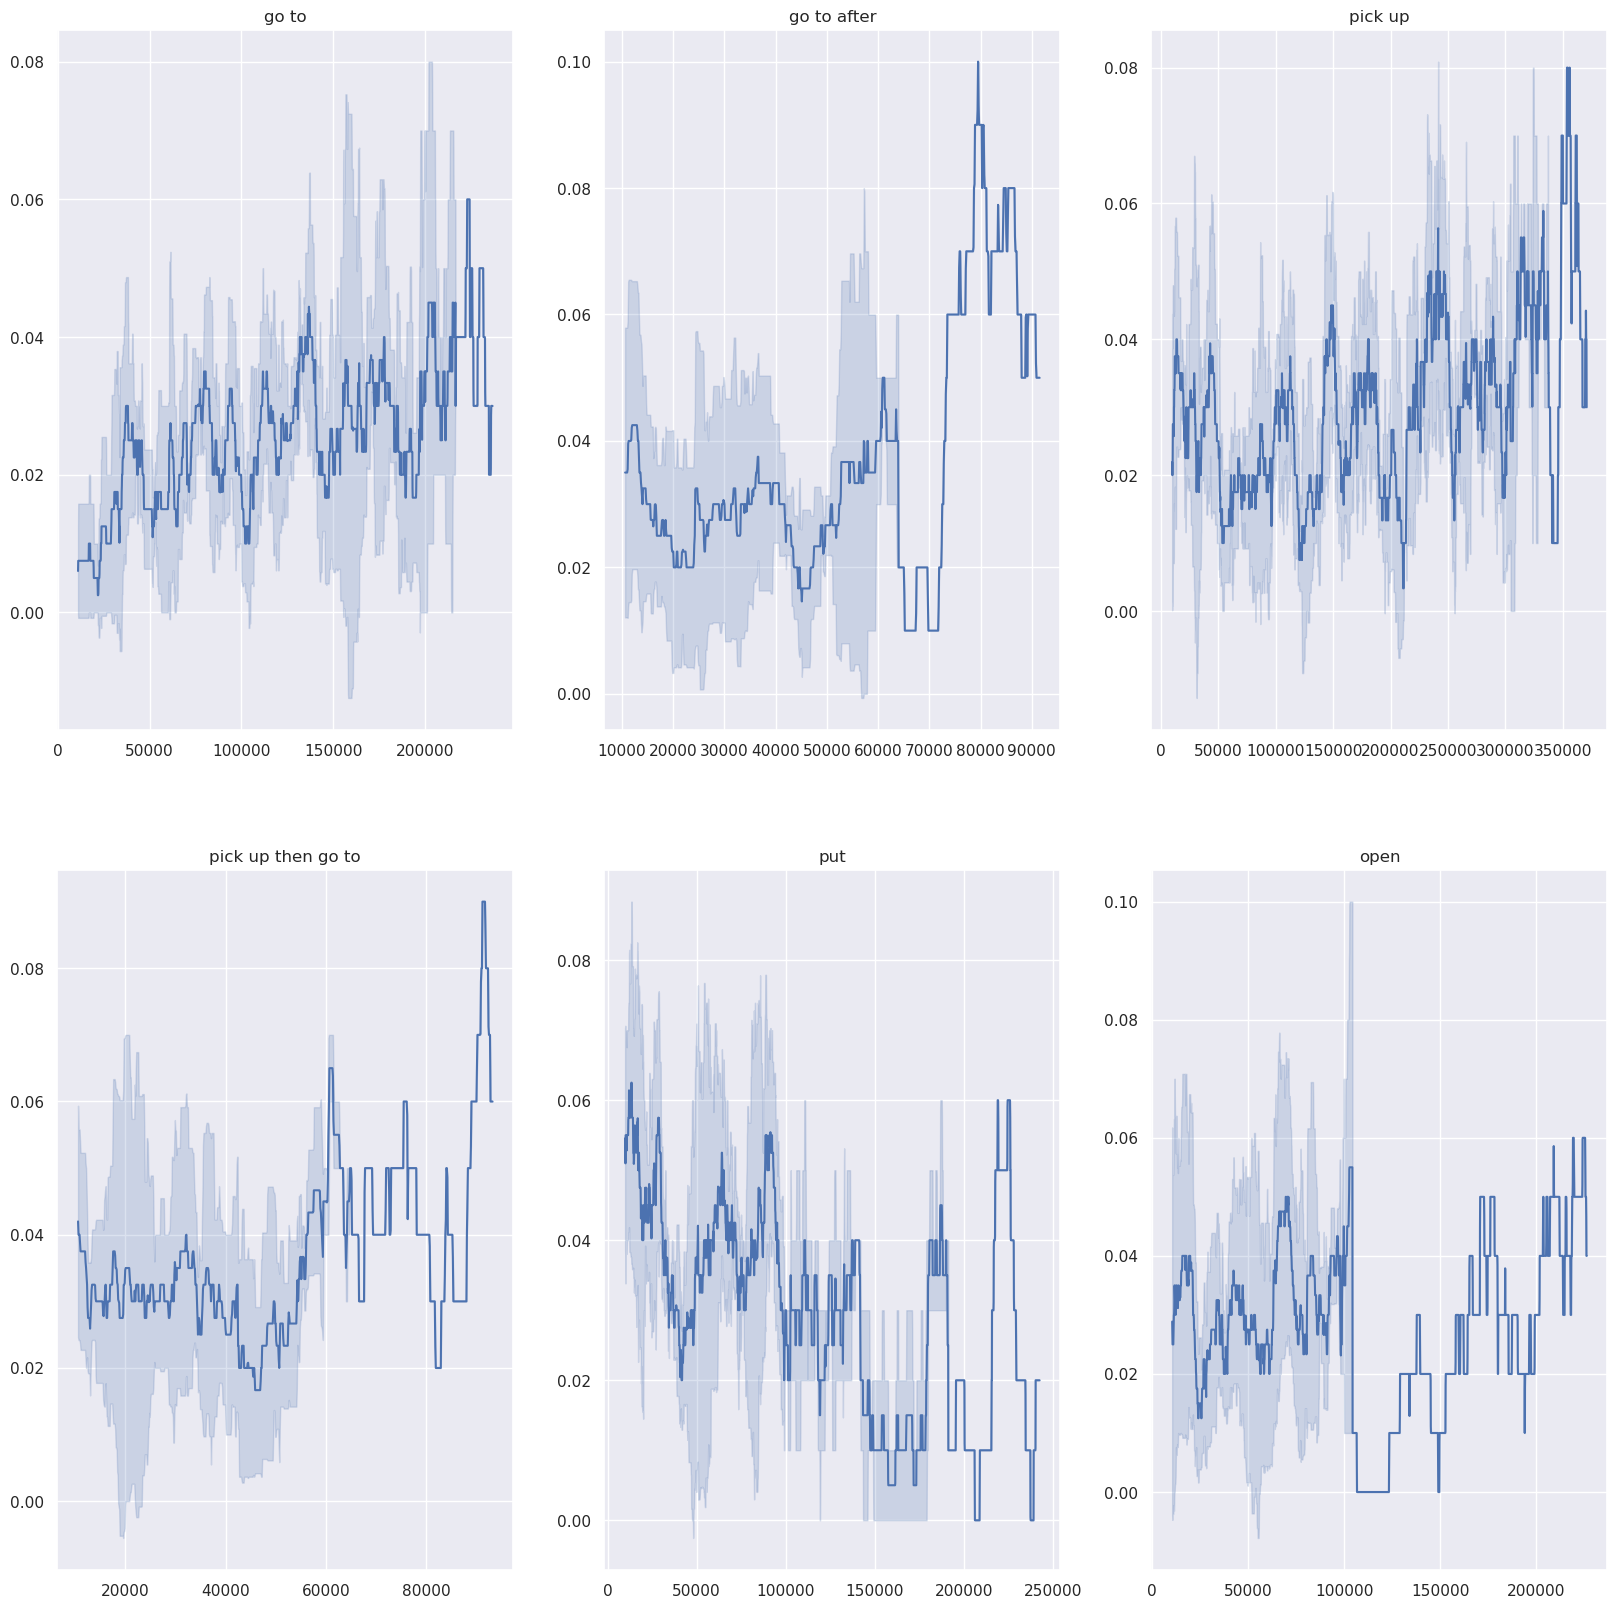

In [13]:
per_task_mean_sr(results["BabyAIMixed_QLoRA_FlanT5-780M"], avg_window=100)

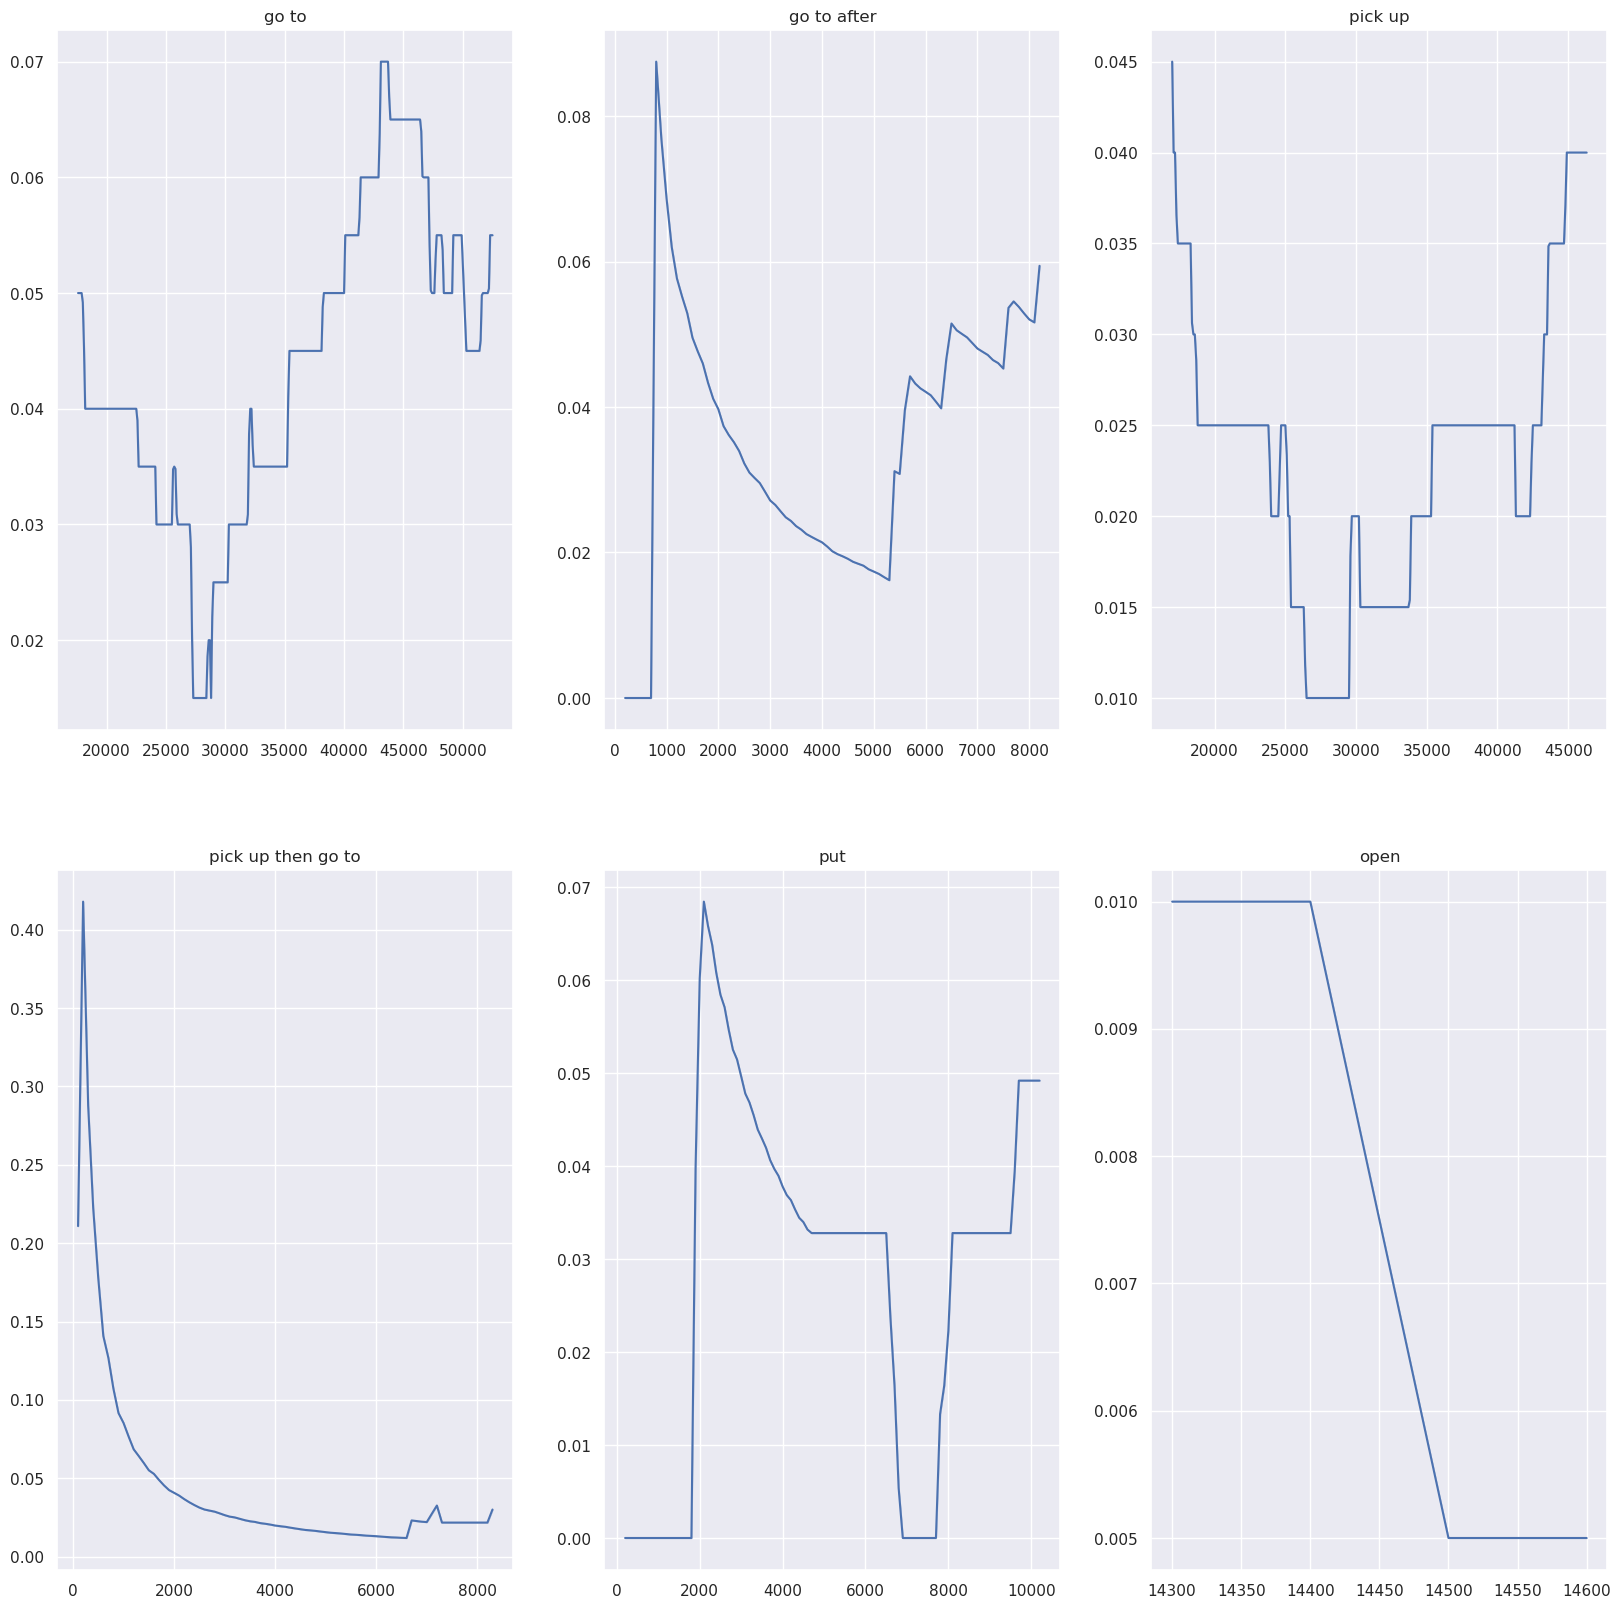

In [198]:
per_task_mean_sr(results["BabyAIMixed_Llama7B"], avg_window=200)

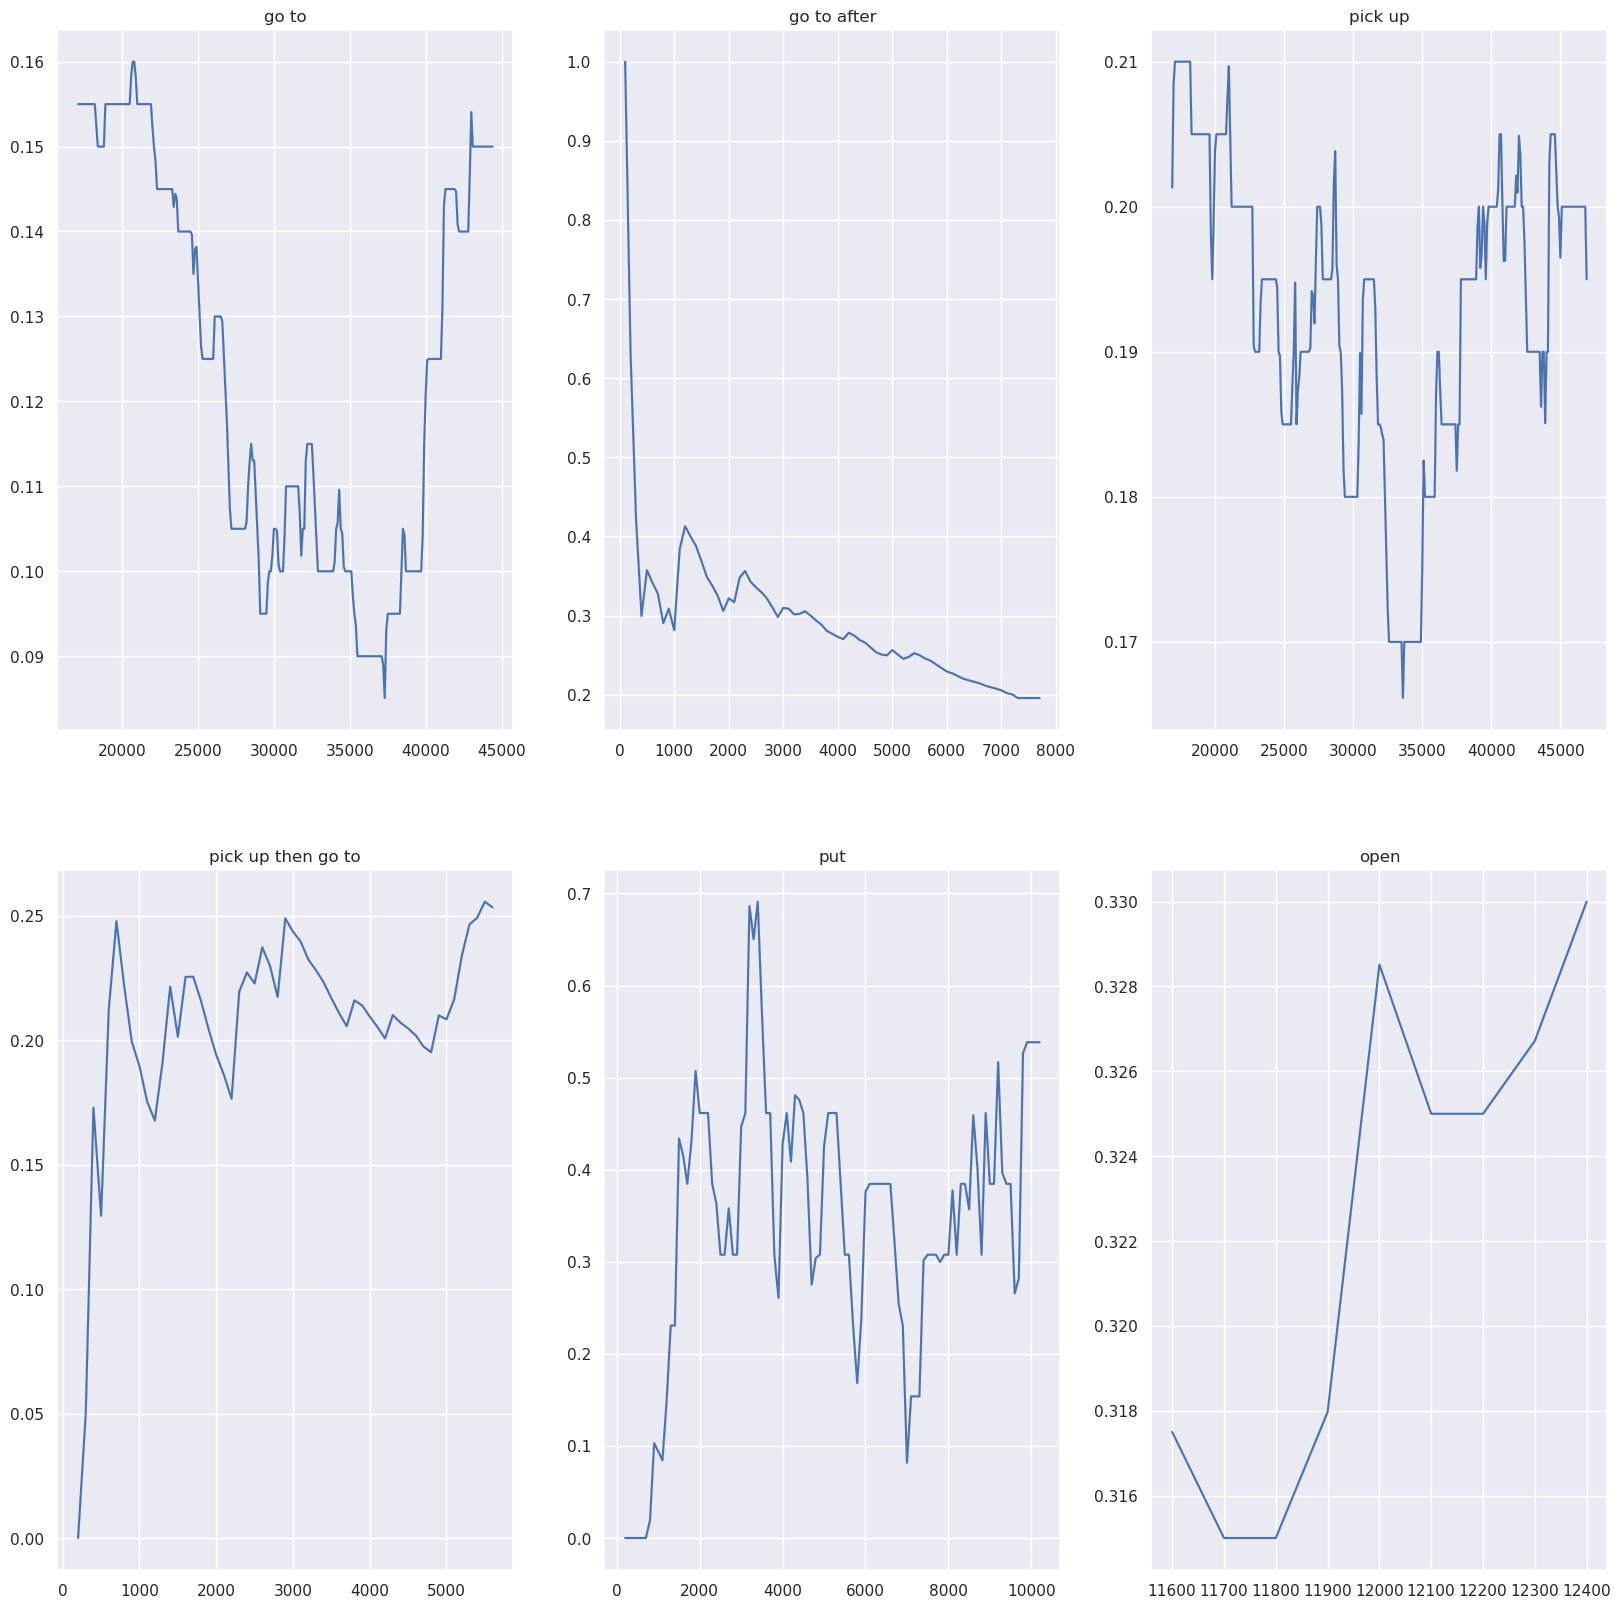

In [199]:
per_task_mean_sr(results["BabyAIMixed_FlanT5-11B"], avg_window=200)

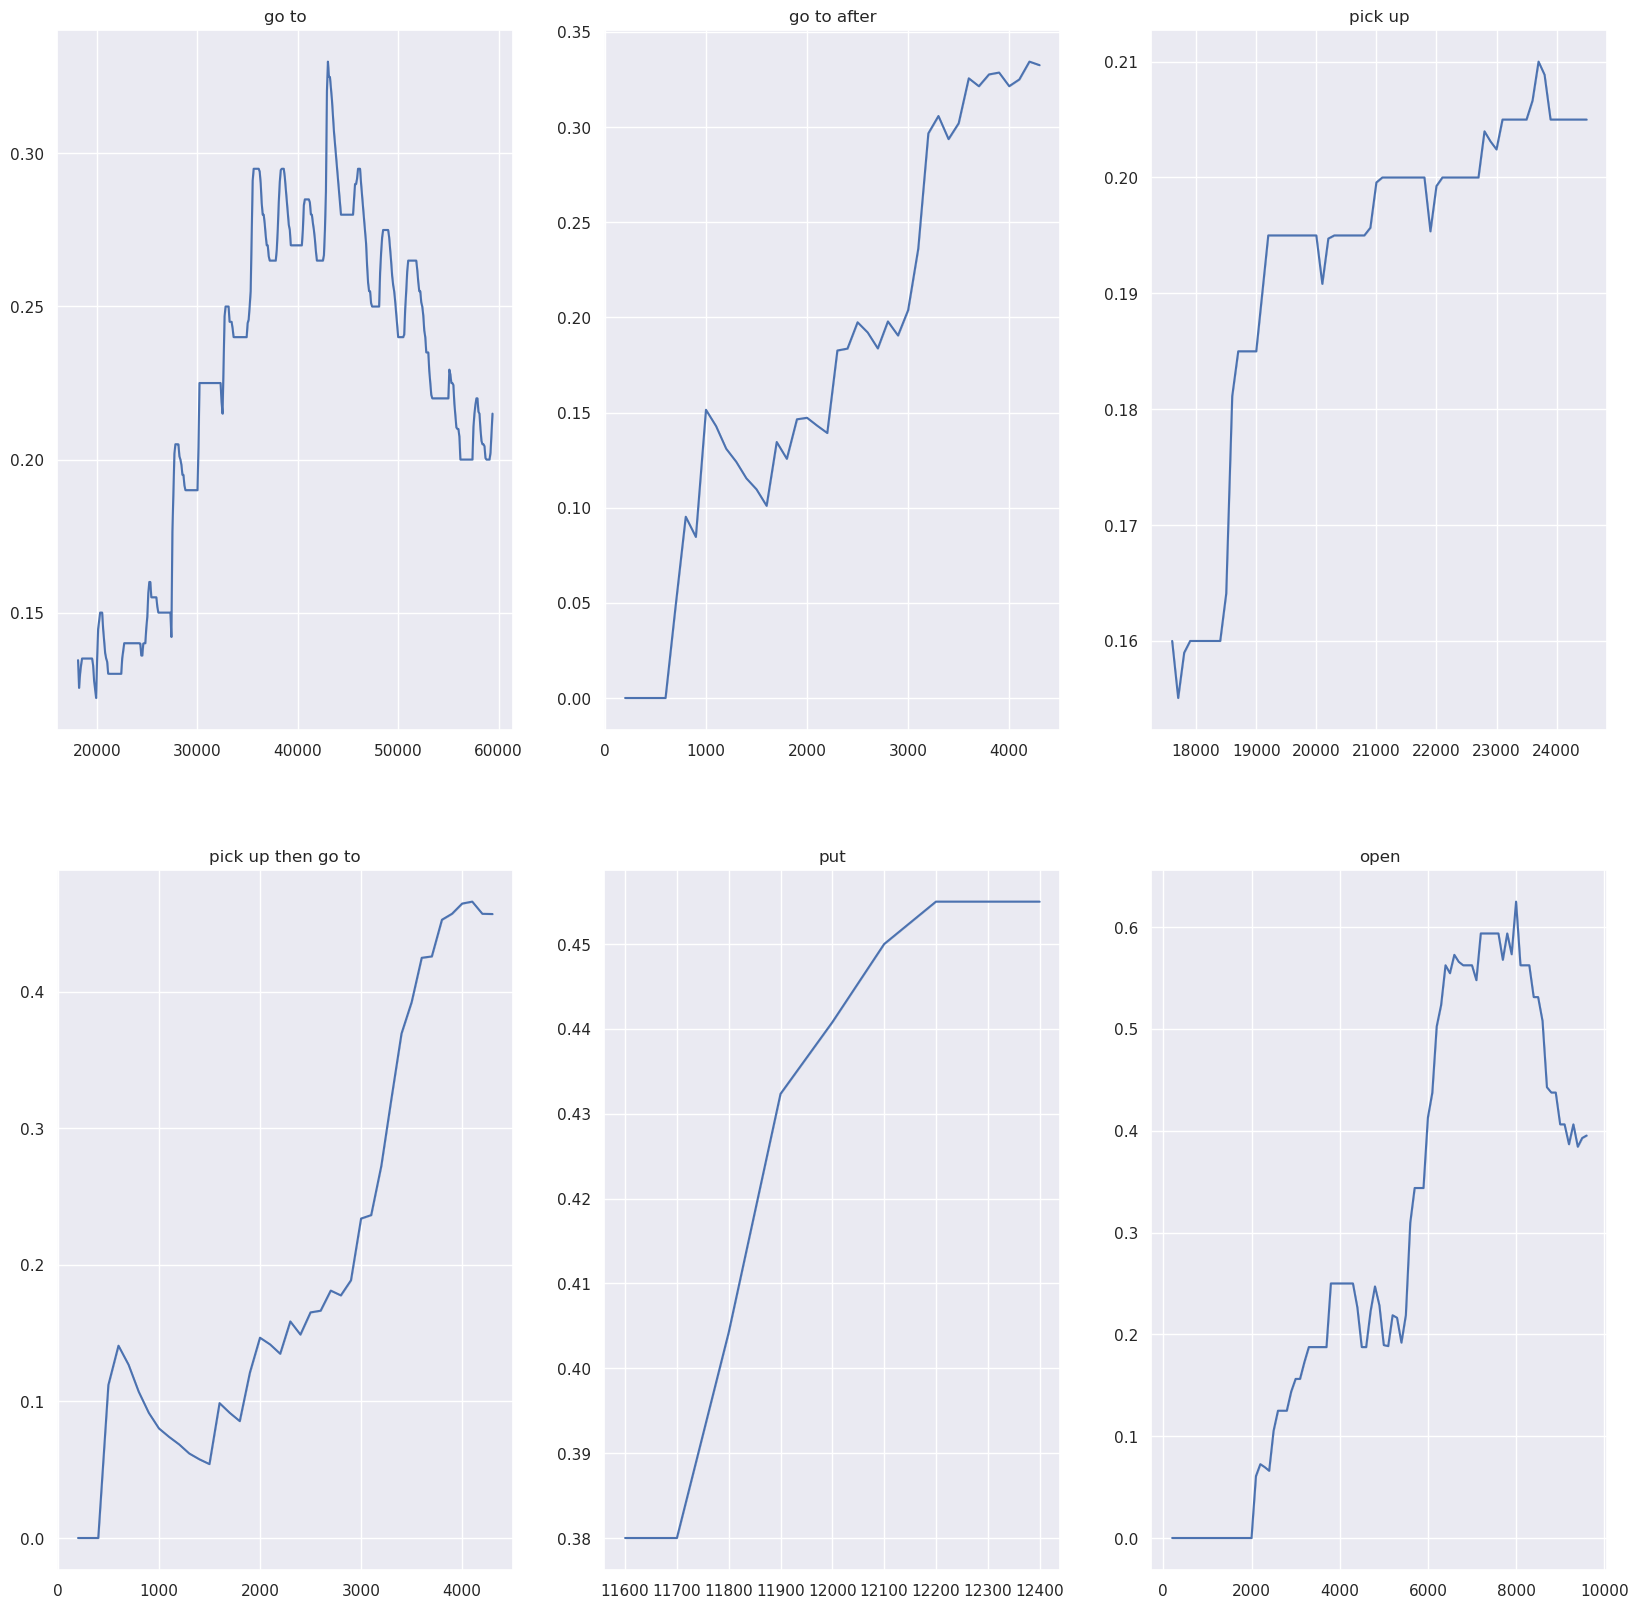

In [200]:
per_task_mean_sr(results["BabyAIMixed_OPT6.7B"], avg_window=200)

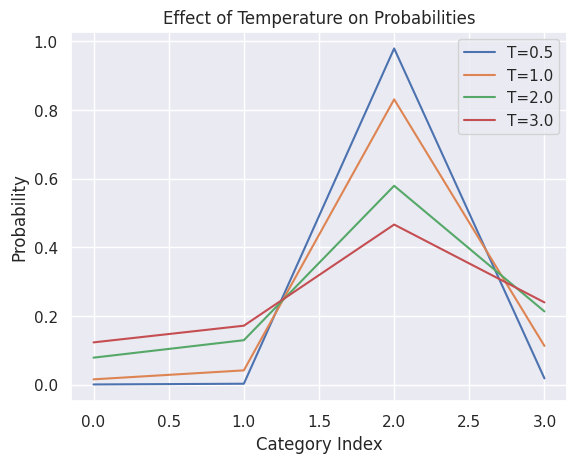

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
temperatures = [0.5, 1.0, 2.0, 3.0]
logits = torch.tensor([1.0, 2.0, 5.0, 3.0])

for T in temperatures:
    scaled_logits = logits / T
    probs = F.softmax(scaled_logits, dim=-1).numpy()
    plt.plot(probs, label=f'T={T}')

plt.title("Effect of Temperature on Probabilities")
plt.xlabel("Category Index")
plt.ylabel("Probability")
plt.legend()
plt.show()
